<a href="https://colab.research.google.com/github/ihsankarim/purrsonalcat/blob/Machine-Learning/Capstone_Kucing_Decision_Tree_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [ ]:
def evaluate_model(model_name, true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f'{model_name} Model Evaluation:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

In [ ]:
def plot_confusion_matrix(conf_matrix, classes, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [ ]:
uploaded = files.upload()
data = pd.read_csv('Dummy_Sklearn.csv')
print(data.head())

Saving Dummy_Sklearn.csv to Dummy_Sklearn (1).csv
   Batuk   Bau mulut  Benjolan atau pembengkakan yang tidak hilang  Bersin  \
0       0          0                                             0       0   
1       0          0                                             0       0   
2       0          0                                             0       0   
3       0          0                                             0       0   
4       0          0                                             0       0   

   Borok di Lidah, Gusi, Bibir, atau Hidung  Buang Air kecil berlebih  \
0                                         0                         0   
1                                         0                         0   
2                                         0                         0   
3                                         0                         0   
4                                         0                         0   

   Buang Air Besar Berlebih  Bulu rontok  

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.15, random_state=125)

# Build a Decision Tree Classifier
model_decision_tree = DecisionTreeClassifier(random_state=51)
model_decision_tree.fit(X_train, y_train_encoded)

# Evaluate the Decision Tree Model
predictions_decision_tree = model_decision_tree.predict(X_test)
evaluate_model("Decision Tree", y_test_encoded, predictions_decision_tree)

Decision Tree Model Evaluation:
Accuracy: 0.868421052631579
Precision: 0.9385964912280701
Recall: 0.868421052631579
F1 Score: 0.844736842105263


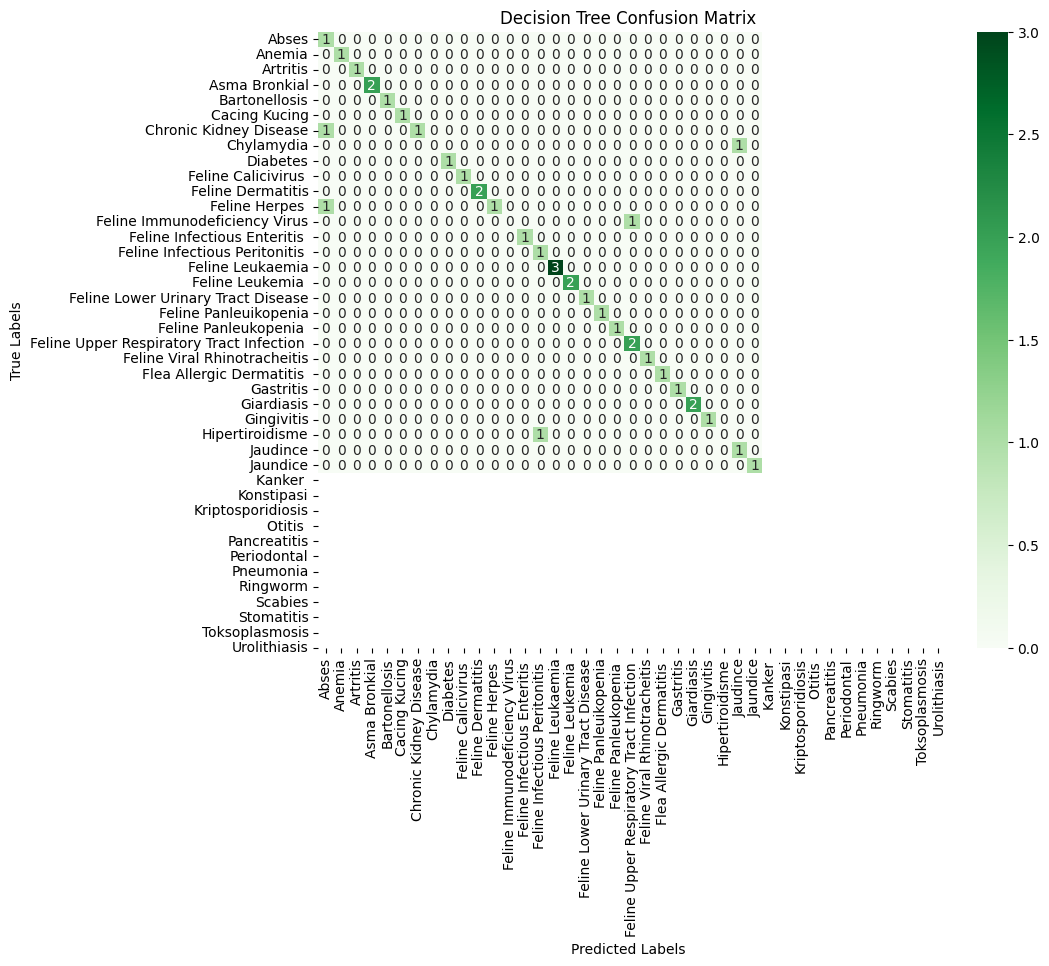

In [ ]:
conf_mat_decision_tree = confusion_matrix(y_test_encoded, predictions_decision_tree)
plot_confusion_matrix(conf_mat_decision_tree, label_encoder.classes_, "Decision Tree Confusion Matrix")

In [ ]:
# Save Decision Tree Model as H5
joblib.dump(model_decision_tree, 'decision_tree_model.h5')
files.download('decision_tree_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>